In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import src.visualization as vis
import importlib
importlib.reload(vis)

<module 'src.visualization' from 'D:\\Study\\GL3\\ppp\\src\\visualization.py'>

In [19]:
data = pd.read_csv('../../data/raw_data/clean_data.csv')
print(data)

            id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
401240  404346  789792  789793   
401241  404347  789794  789795   
401242  404348  789796  789797   
401243  404349  789798  789799   
401244  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
401240  How many keywords are there in the Racket prog...   
401241          Do you believe there is life after death?   
401242                                  Wh

In [12]:
data.describe()

,id,qid1,qid2,is_duplicate
count,401245.000000,401245.000000,401245.000000,401245.000000
mean,202171.525559,391812.805134,390140.327815,0.371955
std,116722.748261,228428.093316,228801.101183,0.483327
min,0.000000,1.000000,2.000000,0.000000
25%,101098.000000,193378.000000,190965.000000,0.000000
50%,202186.000000,390614.000000,388320.000000,0.000000
75%,303256.000000,589489.000000,588009.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [13]:
sample = data.sample(100)

In [14]:
sample.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
58184,58624,116620,116621,How can I simplify the radical [math]\sqrt{72}...,How do I simplify [math]1 + \sqrt{3+\sqrt{8}} ...,0
16233,16353,32639,32640,Which flag is used by string manipulation inst...,What can be a reason a Whirlpool dryer is not ...,0
40973,41286,82234,82235,How is China stable?,Is China a stable country?,1
105884,106702,211625,211626,Which is the best site to download movies?,What are the best sites for downloading movies?,1
366600,369436,722983,722984,How will you know if the guy is cheating?,How do you know if a guy is really into you?,0
111380,112247,222555,222556,Many people have told me that my 4 year old so...,My father is a peon and yesterday someone insu...,0
59917,60371,120082,73784,Was Adolf Hitler Jewish?,Was Hitler an atheist?,0
256078,258025,507846,507847,How much is a typical signing bonus for a soft...,How much does a senior software engineer earn ...,0
377084,380008,743230,743231,What does immiseration mean and how is it used...,What does 'obstinacy' mean and how is it used ...,0
314424,316838,621723,621724,What might cause Beano to not work for someone?,What causes someone to have clear vomit?,0


Duplicate pairs on training set: 37.2%
Number of distinct questions: 783698
Number of questions that appear multiple times: 13611



0              1
1              3
2              5
3              7
4              9
           ...  
802485    789793
802486    789795
802487    789797
802488    789799
802489    789801
Length: 802490, dtype: int64

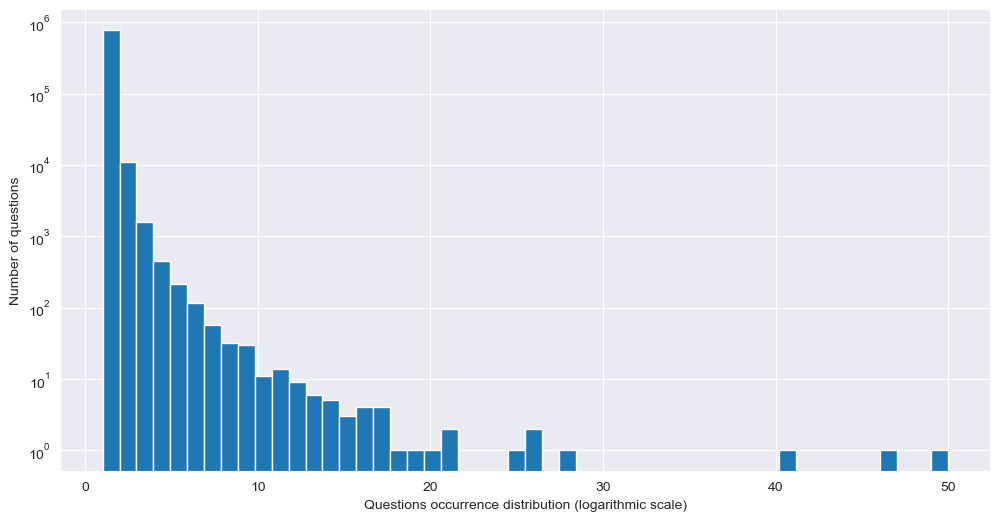

In [15]:
## Print some basic statistics
print('Duplicate pairs on training set: {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

## count occurrences of identified questions on training set
qids = pd.Series(data[data['qid1'].notnull()]['qid1'].tolist() + data[data['qid2'].notnull()]['qid2'].tolist())
print('Number of distinct questions: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 6))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log')

plt.xlabel('Questions occurrence distribution (logarithmic scale)')
plt.ylabel('Number of questions')
print()
qids

In [16]:
result = sample['is_duplicate']

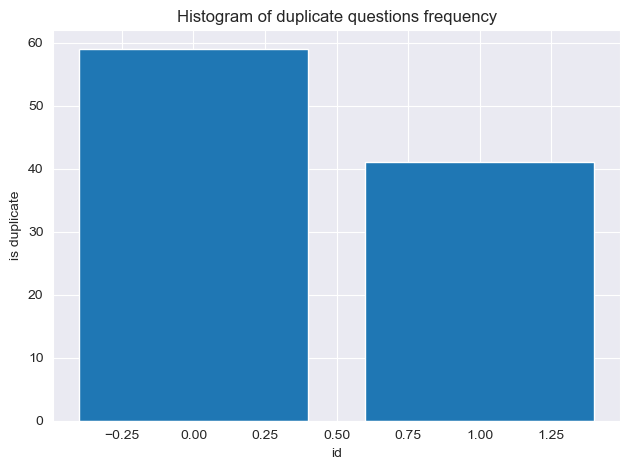

In [17]:

fig, ax = plt.subplots()
ax.hist(result, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
ax.set_xlabel('id')
ax.set_ylabel('is duplicate')
ax.set_title(r'Histogram of duplicate questions frequency')
fig.tight_layout()


plt.show()

In [22]:
# vis.scatterMatrix(data[["is_duplicate"]])

In [23]:
# vis.correlationMatrix(data[["is_duplicate","length1","word_count1"]])

In [ ]:
# vis.scatterMatrix(data[["is_duplicate","length2","word_count2"]])

In [ ]:
# vis.correlationMatrix(data[["is_duplicate","length2","word_count2"]])